## **Forecasting with Best Model: SVM**

In [1]:
import pandas as pd

file_path = "C:/Users/HS/Downloads/FYP_Datasets/Scaled_Dataset.csv"
model_df = pd.read_csv(file_path)

# View summary statistics of 'Sales'
print("Summary Statistics:\n", model_df['Sales'].describe())

features = model_df[['Discount', 'Profit', 'Sales_rolling_mean', 'Sales_rolling_std',
       'Sales_ewma', 'Sales_lag_1', 'Sales_lag_2', 'Sales_lag_3',
       'order_quarterofyear_sin', 'order_quarterofyear_cos']]

Summary Statistics:
 count    6695.000000
mean      137.921241
std       134.833113
min         3.990000
25%        44.100000
50%        90.900000
75%       184.513500
max       727.500000
Name: Sales, dtype: float64


In [2]:
from sklearn.model_selection import train_test_split

X = features
y = model_df['Sales']

# Split data into training-testing sets (80-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define model
svm_model = SVR(
    C=1000,
    kernel='poly',
    gamma=1
)
svm_model.fit(X_train, y_train)

# Make prediction
svm_y_pred = svm_model.predict(X_test)

# Evaluate model
svm_mae = mean_absolute_error(y_test, svm_y_pred)
svm_mse = mean_squared_error(y_test, svm_y_pred)
svm_rmse = np.sqrt(svm_mse)
svm_r2 = r2_score(y_test, svm_y_pred)

print(f"SVM Model Performance Evaluation:")
print(f"MAE: {svm_mae:.5f}")
print(f"MSE: {svm_mse:.8f}")
print(f"RMSE: {svm_rmse:.5f}")
print(f"R² Score: {svm_r2:.5f}")

SVM Model Performance Evaluation:
MAE: 4.42163
MSE: 36.19148241
RMSE: 6.01594
R² Score: 0.99800


C:\Users\HS\AppData\Local\Temp\ipykernel_8348\208772102.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_svm['SVM Predicted Sales'] = svm_y_all_pred
C:\Users\HS\AppData\Local\Temp\ipykernel_8348\208772102.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_svm['Order Date'] = pd.to_datetime(sales_svm['Order Date'])
C:\Users\HS\AppData\Local\Temp\ipykernel_8348\208772102.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

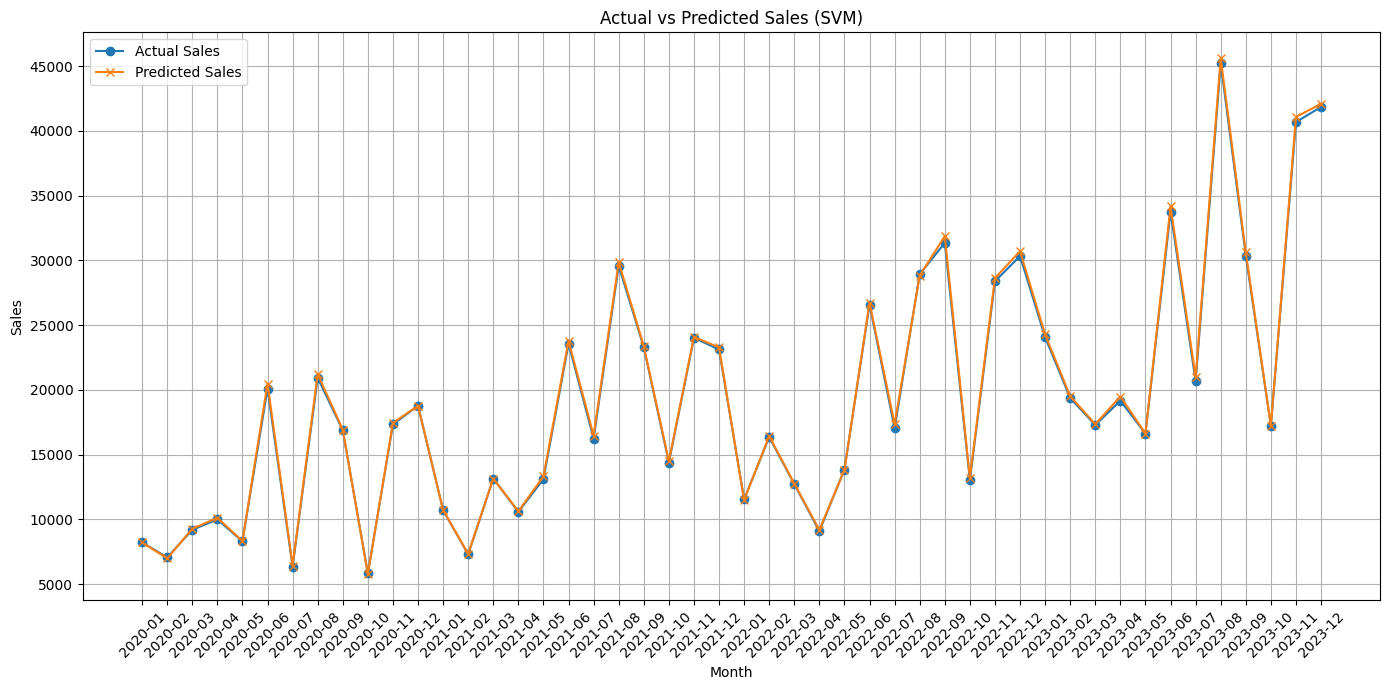

In [4]:
# Make prediction for entire dataset
svm_y_all_pred = svm_model.predict(X)

sales_svm = model_df[['Order Date', 'Sales']]

sales_svm['SVM Predicted Sales'] = svm_y_all_pred

# Convert 'Order Date' to datetime format
sales_svm['Order Date'] = pd.to_datetime(sales_svm['Order Date'])

exp_data = sales_svm['SVM Predicted Sales']

# Aggregate sales by month and year
sales_svm['Month'] = sales_svm['Order Date'].dt.to_period('M')
mth_sales_svm = sales_svm.groupby('Month').agg({'Sales': 'sum', 'SVM Predicted Sales': 'sum', }).reset_index()

import matplotlib.pyplot as plt

# Plot actual vs predicted sales
plt.figure(figsize=(14, 7))
plt.plot(mth_sales_svm['Month'].astype(str), mth_sales_svm['Sales'], label='Actual Sales', marker='o')
plt.plot(mth_sales_svm['Month'].astype(str), mth_sales_svm['SVM Predicted Sales'], label='Predicted Sales', marker='x')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales (SVM)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

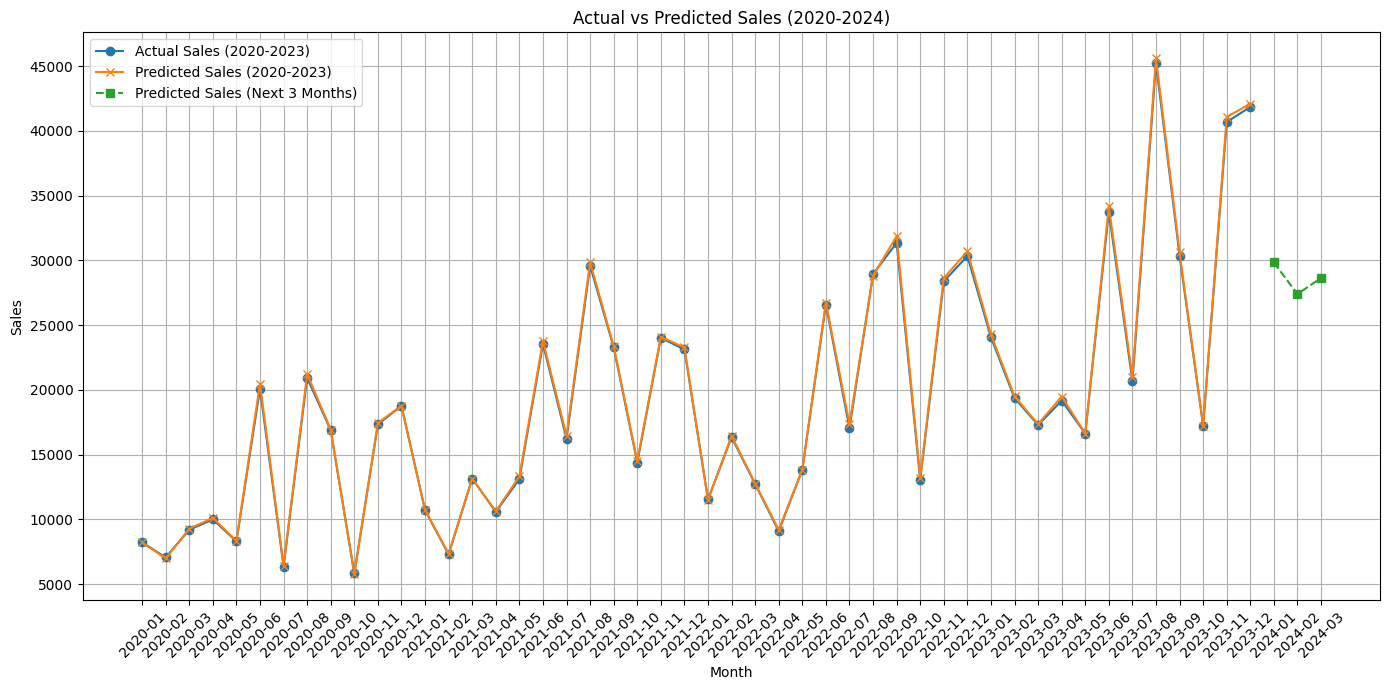

In [5]:
# Create relative trend pattern
mth_sales_svm['Year'] = mth_sales_svm['Month'].dt.year
mth_sales_svm['Month_Num'] = mth_sales_svm['Month'].dt.month

avg_sales = mth_sales_svm[mth_sales_svm['Year'] < 2024].groupby('Month_Num')['Sales'].mean()
trend = avg_sales / avg_sales.mean()

pred_sales = mth_sales_svm[mth_sales_svm['Year'] == 2023]['SVM Predicted Sales'].values[-1]
next_3mth = trend.iloc[:3].values
sales_next_3mth = pred_sales * next_3mth

pred_3mth = pd.period_range(start='2024-01', periods=3, freq='M')
sales_next_3mth_df = pd.DataFrame({
    'Month': pred_3mth,
    'Predicted Sales': sales_next_3mth
})

# Plot the predicted sales for the next 3 months
plt.figure(figsize=(14, 7))
plt.plot(mth_sales_svm['Month'].astype(str), mth_sales_svm['Sales'], label='Actual Sales (2020-2023)', marker='o')
plt.plot(mth_sales_svm['Month'].astype(str), mth_sales_svm['SVM Predicted Sales'], label='Predicted Sales (2020-2023)', marker='x')
plt.plot(sales_next_3mth_df['Month'].astype(str), sales_next_3mth_df['Predicted Sales'], label='Predicted Sales (Next 3 Months)', marker='s', linestyle='--')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales (2020-2024)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

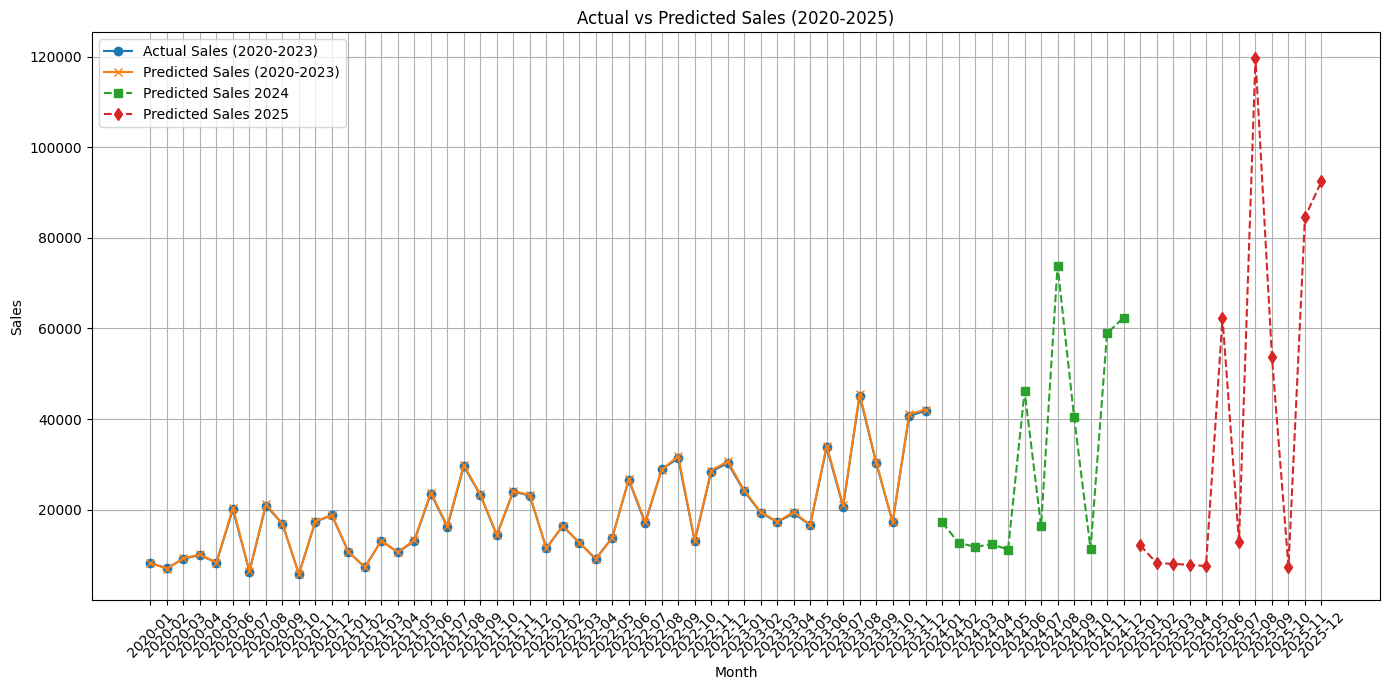

In [6]:
# Create relative trend pattern
mth_sales_svm['Year'] = mth_sales_svm['Month'].dt.year
mth_sales_svm['Month_Num'] = mth_sales_svm['Month'].dt.month

avg_mth_sales = mth_sales_svm[mth_sales_svm['Year'] < 2024].groupby('Month_Num')['Sales'].mean()
trend = avg_mth_sales / avg_mth_sales.mean()

pred_2023 = mth_sales_svm[mth_sales_svm['Year'] == 2023]['SVM Predicted Sales'].values
pred_2024 = pred_2023 * trend.values
pred_2025 = pred_2024 * trend.values

months_2024 = pd.period_range(start='2024-01', end='2024-12', freq='M')
months_2025 = pd.period_range(start='2025-01', end='2025-12', freq='M')

sales_2024_df = pd.DataFrame({
    'Month': months_2024,
    'Predicted Sales 2024': pred_2024
})

sales_2025_df = pd.DataFrame({
    'Month': months_2025,
    'Predicted Sales 2025': pred_2025
})

# Plot Predicted Sales for 2024 and 2025
plt.figure(figsize=(14, 7))
plt.plot(mth_sales_svm['Month'].astype(str), mth_sales_svm['Sales'], label='Actual Sales (2020-2023)', marker='o')
plt.plot(mth_sales_svm['Month'].astype(str), mth_sales_svm['SVM Predicted Sales'], label='Predicted Sales (2020-2023)', marker='x')
plt.plot(sales_2024_df['Month'].astype(str), sales_2024_df['Predicted Sales 2024'], label='Predicted Sales 2024', marker='s', linestyle='--')
plt.plot(sales_2025_df['Month'].astype(str), sales_2025_df['Predicted Sales 2025'], label='Predicted Sales 2025', marker='d', linestyle='--')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales (2020-2025)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

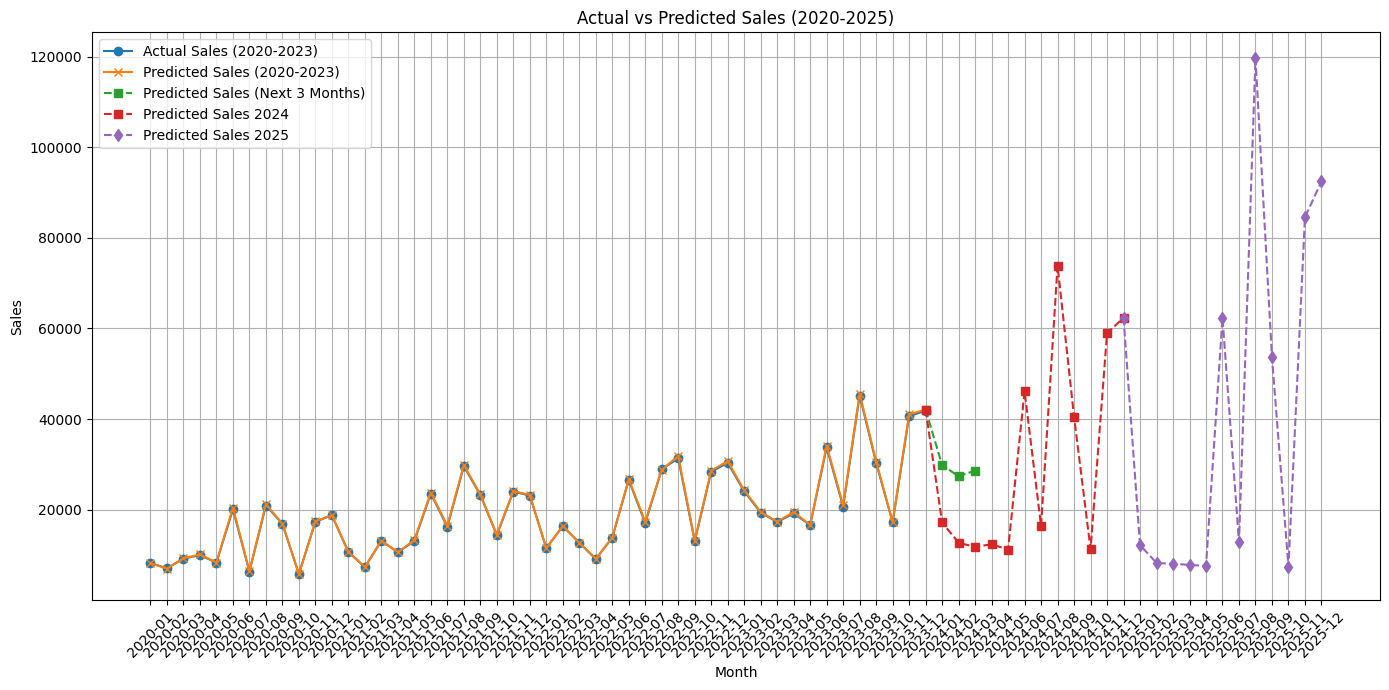

In [7]:
# Create relative trend pattern
mth_sales_svm['Year'] = mth_sales_svm['Month'].dt.year
mth_sales_svm['Month_Num'] = mth_sales_svm['Month'].dt.month

avg_mth_sales = mth_sales_svm[mth_sales_svm['Year'] < 2024].groupby('Month_Num')['Sales'].mean()
trend = avg_mth_sales / avg_mth_sales.mean()

pred_2023 = mth_sales_svm[mth_sales_svm['Year'] == 2023]['SVM Predicted Sales'].values
pred_2024 = pred_2023 * trend.values
pred_2025 = pred_2024 * trend.values

months_2024 = pd.period_range(start='2024-01', end='2024-12', freq='M')
months_2025 = pd.period_range(start='2025-01', end='2025-12', freq='M')

sales_2024_df = pd.DataFrame({
    'Month': months_2024,
    'Predicted Sales 2024': pred_2024
})

sales_2025_df = pd.DataFrame({
    'Month': months_2025,
    'Predicted Sales 2025': pred_2025
})

next_3mth_lag = sales_next_3mth_df.copy()
next_3mth_lag.loc[-1] = [mth_sales_svm['Month'].iloc[-1], mth_sales_svm['SVM Predicted Sales'].iloc[-1]]
next_3mth_lag.index = next_3mth_lag.index + 1
next_3mth_lag = next_3mth_lag.sort_index()

y2024_lag = sales_2024_df.copy()
y2024_lag.loc[-1] = [mth_sales_svm['Month'].iloc[-1], mth_sales_svm['SVM Predicted Sales'].iloc[-1]]
y2024_lag.index = y2024_lag.index + 1
y2024_lag = y2024_lag.sort_index()

y2025_lag = sales_2025_df.copy()
y2025_lag.loc[-1] = [sales_2024_df['Month'].iloc[-1], sales_2024_df['Predicted Sales 2024'].iloc[-1]]
y2025_lag.index = y2025_lag.index + 1
y2025_lag = y2025_lag.sort_index()

# Plot Continuous Predicted Sales for 2024 and 2025
plt.figure(figsize=(14, 7))
plt.plot(mth_sales_svm['Month'].astype(str), mth_sales_svm['Sales'], label='Actual Sales (2020-2023)', marker='o')
plt.plot(mth_sales_svm['Month'].astype(str), mth_sales_svm['SVM Predicted Sales'], label='Predicted Sales (2020-2023)', marker='x')
plt.plot(next_3mth_lag['Month'].astype(str), next_3mth_lag['Predicted Sales'], label='Predicted Sales (Next 3 Months)', marker='s', linestyle='--')
plt.plot(y2024_lag['Month'].astype(str), y2024_lag['Predicted Sales 2024'], label='Predicted Sales 2024', marker='s', linestyle='--')
plt.plot(y2025_lag['Month'].astype(str), y2025_lag['Predicted Sales 2025'], label='Predicted Sales 2025', marker='d', linestyle='--')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales (2020-2025)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
# Combine the predicted sales for 2024 and 2025 into a single DataFrame
pred_sales = pd.concat([mth_sales_svm, sales_next_3mth_df, sales_2024_df, sales_2025_df], ignore_index=True) 
lag_sales = pd.concat([mth_sales_svm, next_3mth_lag, y2024_lag, y2025_lag], ignore_index=True)

# Export the combined DataFrame to a CSV file
pred_sales.to_csv('C:/Users/HS/Downloads/FYP_Datasets/Predicted_Sales_2024_2025.csv', index=False)
lag_sales.to_csv('C:/Users/HS/Downloads/FYP_Datasets/Lag_Sales_2024_2025.csv', index=False)

print("Sales predictions for 2024 and 2025 have been exported")

Sales predictions for 2024 and 2025 have been exported
